In [101]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [102]:
xl = pd.ExcelFile('/Users/spencerfogelman/Downloads/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [103]:
nycrime = xl.parse('13tbl8ny', skiprows=4)

In [104]:
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [105]:
nycrime.isnull().count()

City                                      351
Population                                351
Violent\ncrime                            351
Murder and\nnonnegligent\nmanslaughter    351
Rape\n(revised\ndefinition)1              351
Rape\n(legacy\ndefinition)2               351
Robbery                                   351
Aggravated\nassault                       351
Property\ncrime                           351
Burglary                                  351
Larceny-\ntheft                           351
Motor\nvehicle\ntheft                     351
Arson3                                    351
dtype: int64

In [106]:
nycrime.isnull().mean()

City                                     0.000
Population                               0.009
Violent\ncrime                           0.009
Murder and\nnonnegligent\nmanslaughter   0.009
Rape\n(revised\ndefinition)1             1.000
Rape\n(legacy\ndefinition)2              0.009
Robbery                                  0.009
Aggravated\nassault                      0.009
Property\ncrime                          0.009
Burglary                                 0.009
Larceny-\ntheft                          0.009
Motor\nvehicle\ntheft                    0.009
Arson3                                   0.467
dtype: float64

In [107]:
nycrime.drop(labels=['Rape\n(revised\ndefinition)1'], axis=1, inplace = True)

In [108]:
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [109]:
nycrime['ArsonNull'] = np.where(nycrime['Arson3'].isnull(), 1, 0)

In [110]:
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,ArsonNull
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,0
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,0
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,0
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan,1
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan,1


In [111]:
nycrime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'ArsonNull'],
      dtype='object')

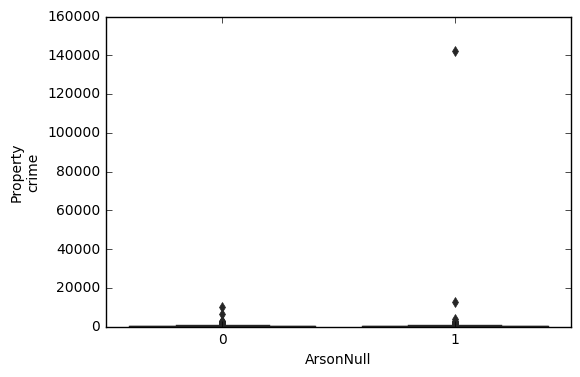

In [112]:
sns.boxplot(data=nycrime, x='ArsonNull', y='Property\ncrime')

(array([183.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  13.2,  26.4,  39.6,  52.8,  66. ,  79.2,  92.4, 105.6,
        118.8, 132. ]),
 <a list of 10 Patch objects>)

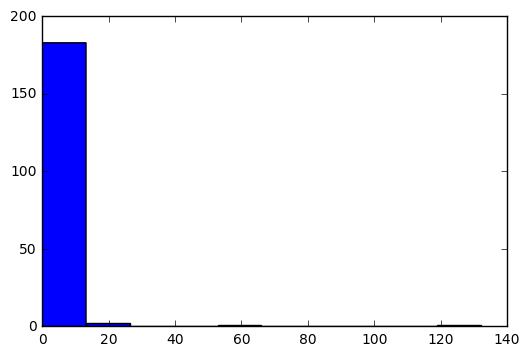

In [113]:
plt.hist(nycrime['Arson3'].dropna())

In [114]:
nycrime['Arson3'].median()

0.0

In [115]:
nycrime.columns[1:]

Index(['Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'ArsonNull'],
      dtype='object')

In [116]:
for col in nycrime.columns[1:]:
    median = nycrime[col].median()
    nycrime[col].fillna(median, inplace=True)

In [117]:
nycrime.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,ArsonNull
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000,0
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000,0
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000,0
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,0.000,1
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000,0.000,1


In [118]:
nycrime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'ArsonNull'],
      dtype='object')

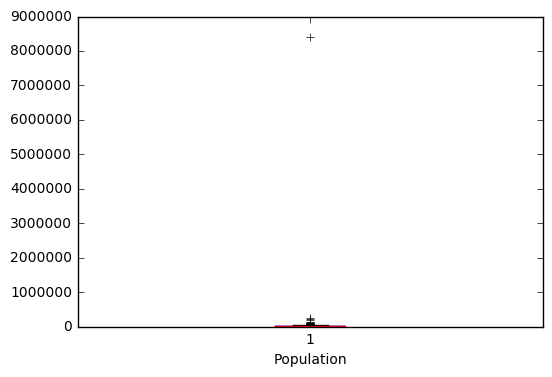

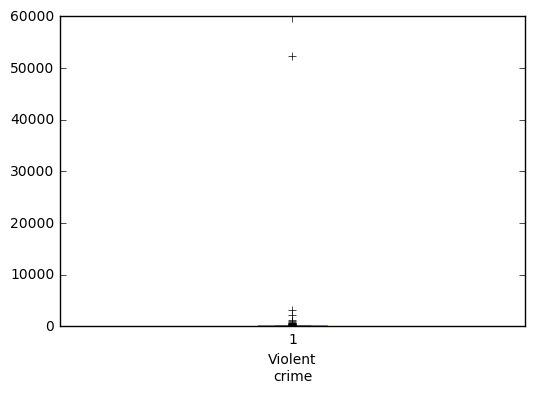

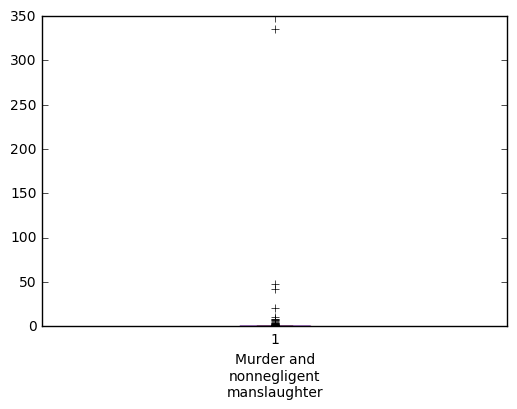

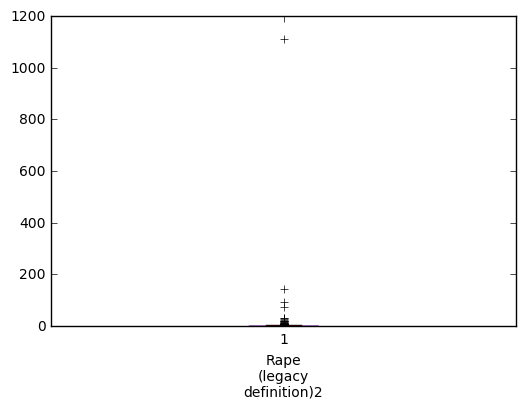

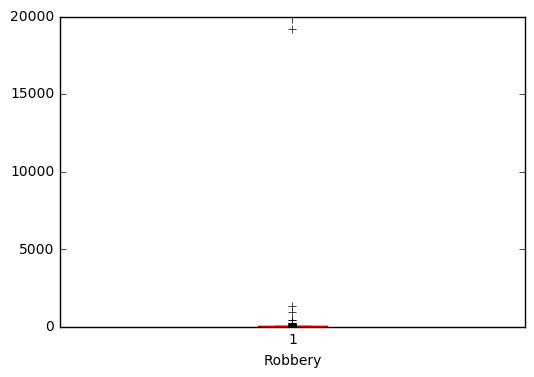

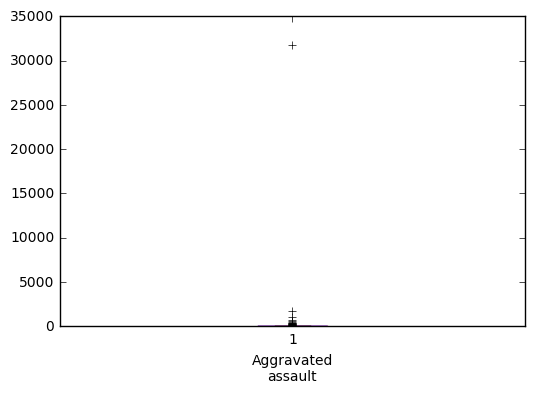

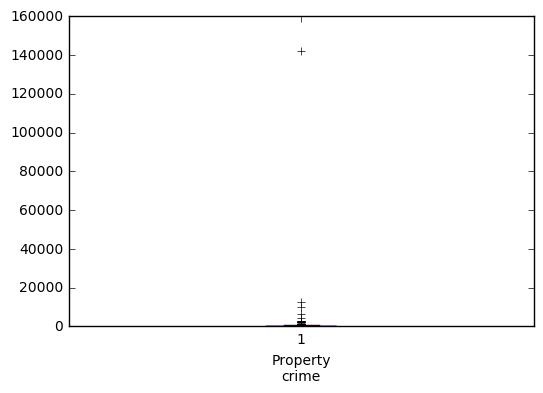

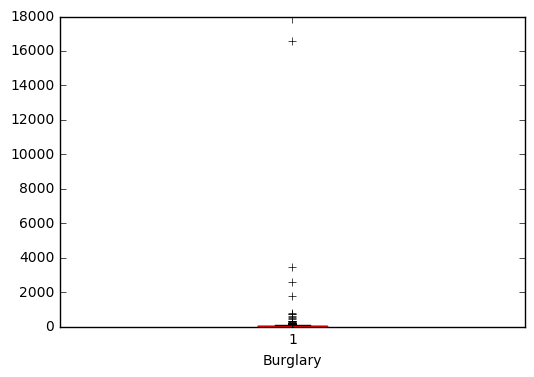

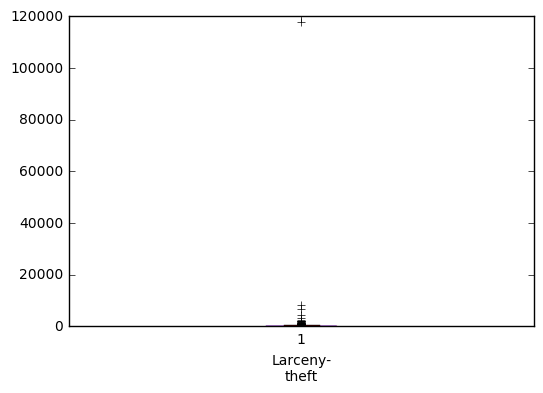

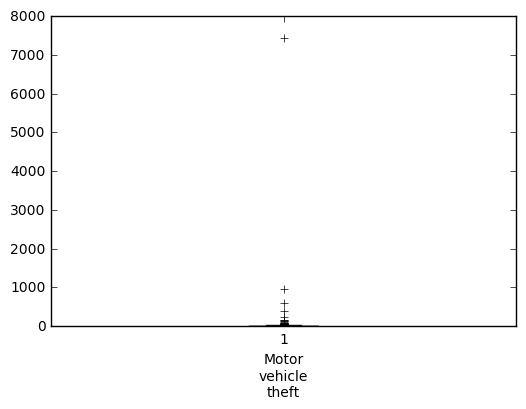

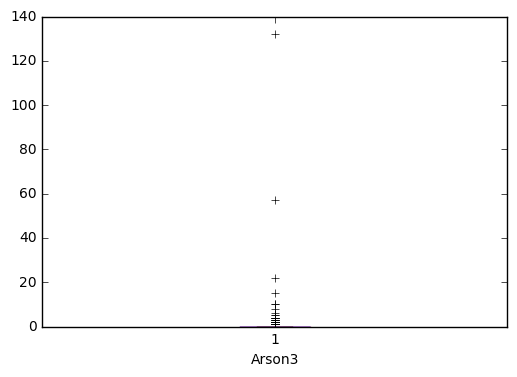

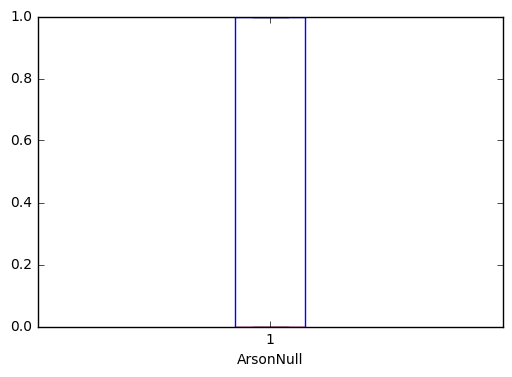

In [119]:
for col in nycrime.columns[1:]: 
    plt.boxplot(nycrime[col])
    plt.xlabel(col)
    plt.show()

In [121]:
for col in nycrime.columns[1:]:
    iqr = nycrime[col].quantile(0.75) - nycrime[col].quantile(0.25)
    upper_fence = nycrime[col].median() + 3 * iqr
    lower_fence = nycrime[col].median() - 3 * iqr
    nycrime.loc[nycrime[col] > upper_fence, col] = np.nan
    nycrime.loc[nycrime[col] < lower_fence, col] = np.nan


In [122]:
nycrime.shape

(351, 13)

In [123]:
nycrime.dropna(inplace=True)

In [124]:
nycrime.shape

(252, 13)

In [125]:
nycrime.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3', 'ArsonNull'],
      dtype='object')

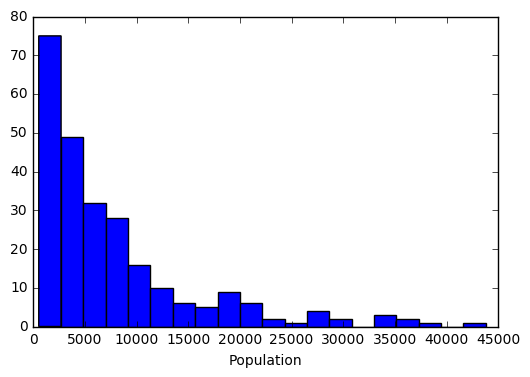

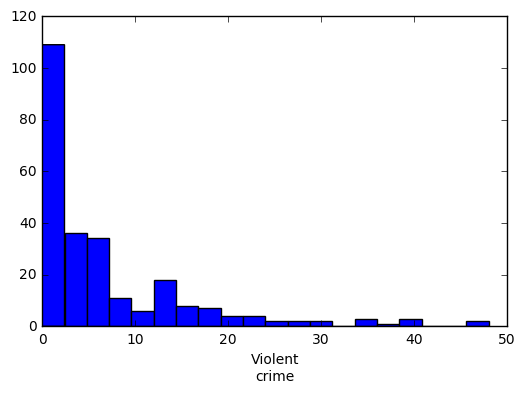

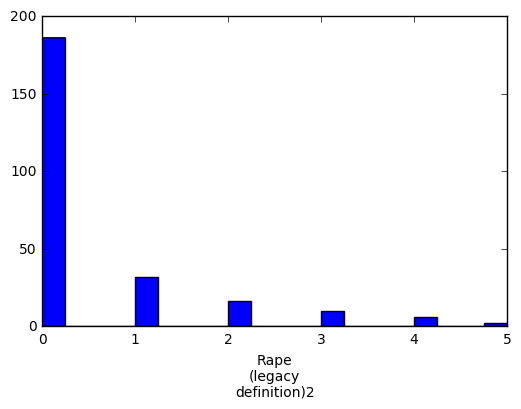

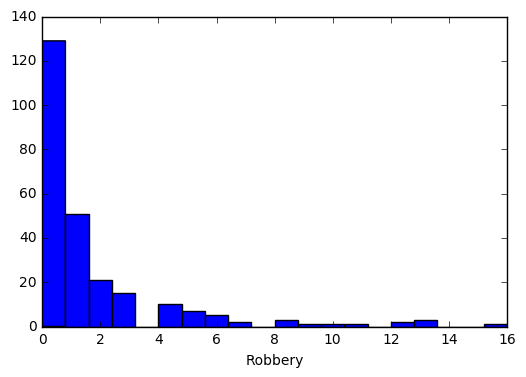

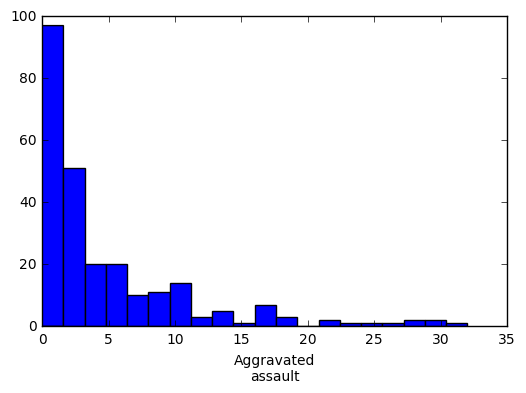

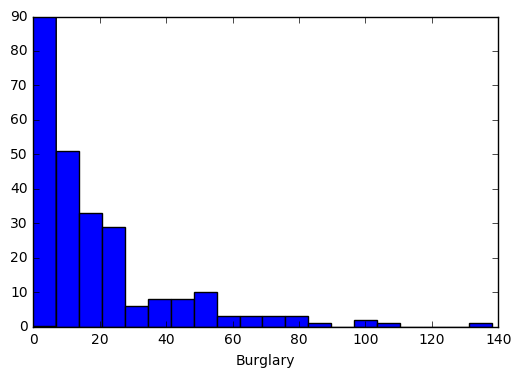

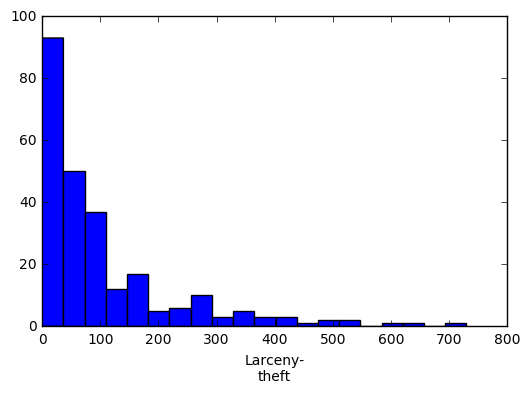

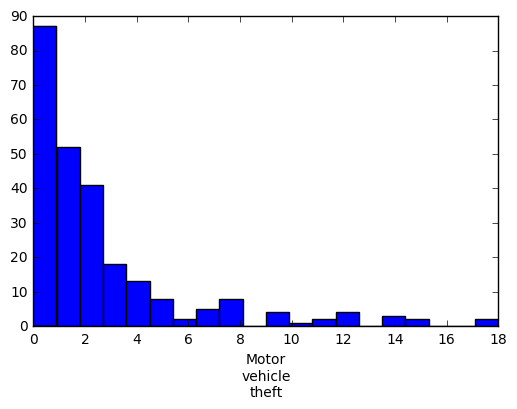

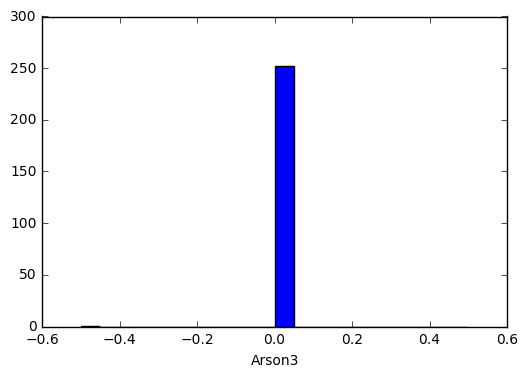

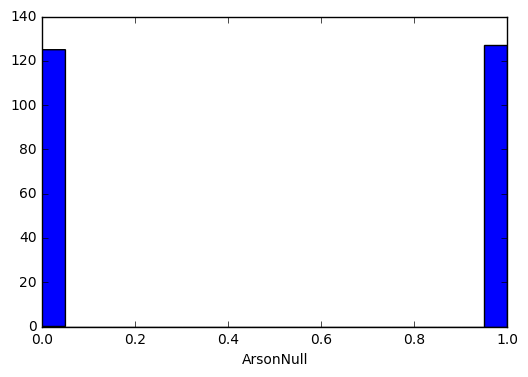

In [126]:
for col in cols:
    plt.hist(nycrime[col], bins=20)
    plt.xlabel(col)
    plt.show()

In [127]:
nycrime['Murder and\nnonnegligent\nmanslaughter'].value_counts()

0.000    252
Name: Murder and\nnonnegligent\nmanslaughter, dtype: int64

In [128]:
nycrime.drop('Murder and\nnonnegligent\nmanslaughter', axis=1, inplace = True)

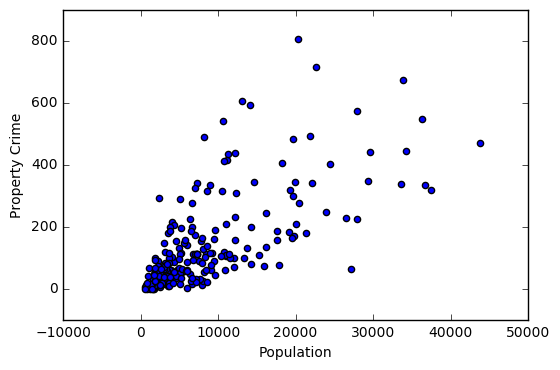

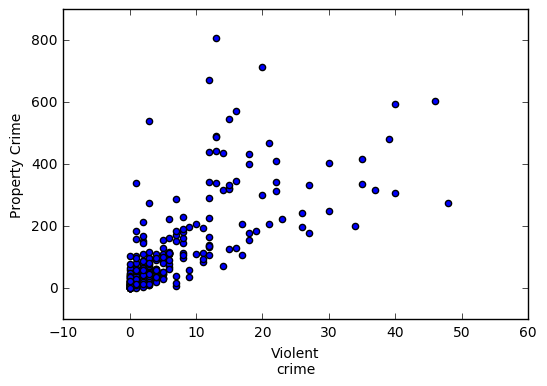

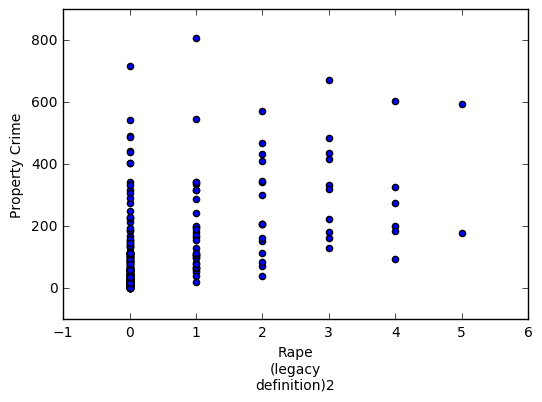

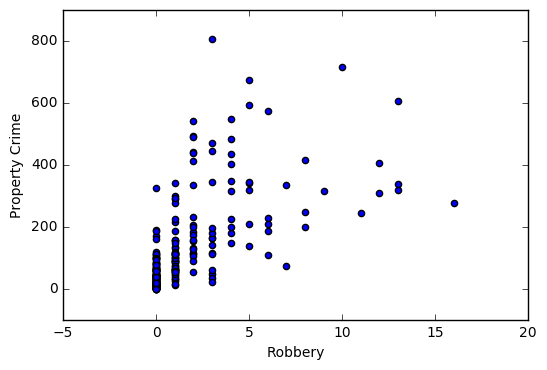

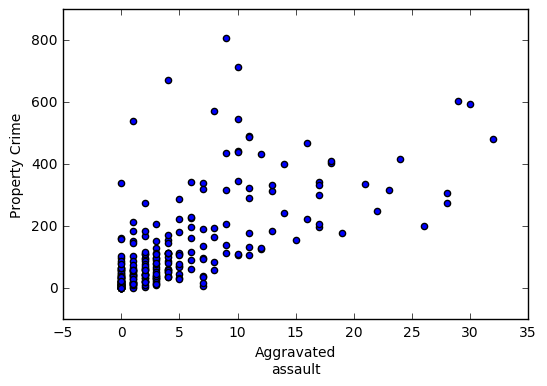

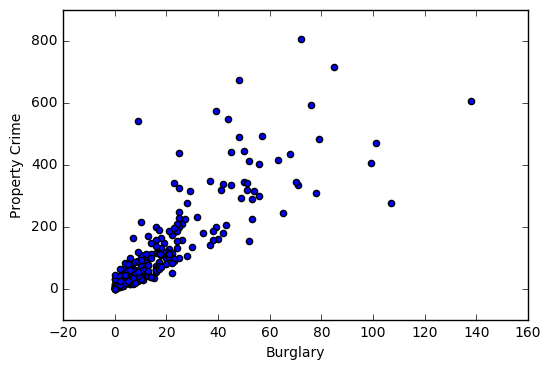

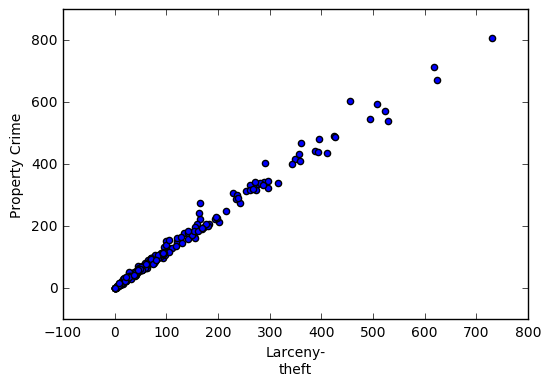

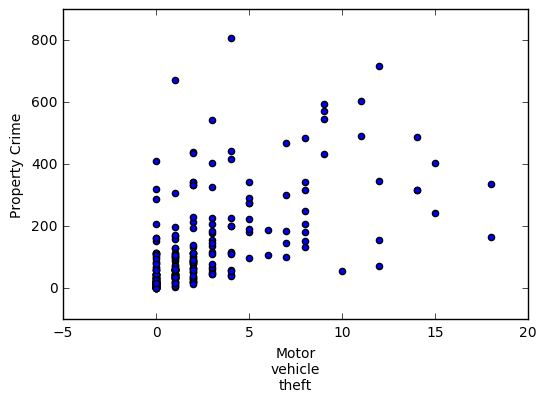

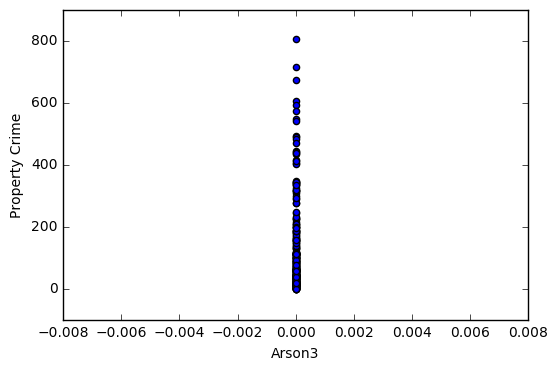

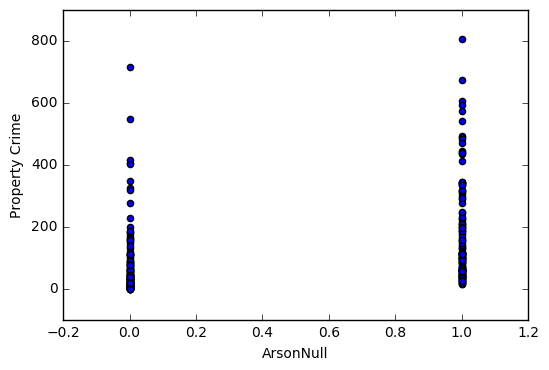

In [130]:
for col in cols:
    plt.scatter(nycrime[col], nycrime['Property\ncrime'])
    plt.xlabel(col)
    plt.ylabel('Property Crime')
    plt.show()

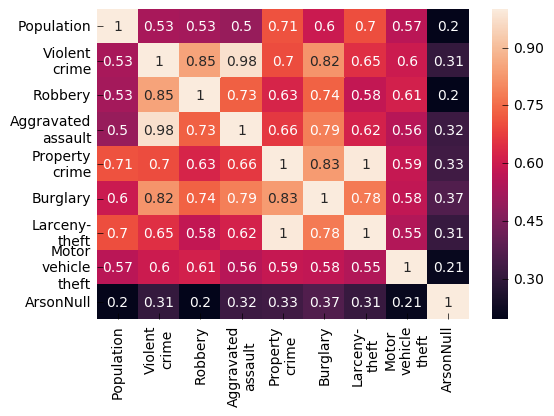

In [132]:
corr = nycrime.drop(['Arson3', 'Rape\n(legacy\ndefinition)2'], axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [133]:
X = nycrime[cols].drop(['Arson3', 'Rape\n(legacy\ndefinition)2'], axis=1)
y = nycrime['Property\ncrime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [134]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train, y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.score(X_train, y_train))
print(linreg.score(X_test, y_test))

0.9999993045460589
0.99999962797542


In [136]:
linreg.coef_

array([-7.53194257e-03, -3.91411728e-01,  1.40808133e-01,  2.60852677e-01,
        1.06999682e+02,  6.18023972e+02,  1.79844875e+01, -2.49096545e-02])

#Questions
1) My variables are not normally distributed, but my model still predicted accurately. Does this matter?
2) I imputed for my null values but then dropped the extremes. Would it make sense to drop both?
3) After I dropped the outliers, the variables were not as strongly correlated with each other, but still correlated. What would you do in this situation? PCA?